# Grabbing Flux information
We can use pyNuHepMC to see if the input file comes with flux information. The interface is currently quite clunky, it will be improved in future revisions.

[2024-02-27 19:00:46.100] [info] Found eventinput plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-eventinput-GHEP3.so
[2024-02-27 19:00:46.100] [info] Found eventinput plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-eventinput-NuWroevent1.so
[2024-02-27 19:00:46.100] [info] Found eventinput plugin: /root/software/NUISANCEMC/eventinput/build/Linux/lib/plugins/nuisplugin-eventinput-neutvect.so
[2024-02-27 19:00:46.100] [info] EventSourceFactory: PathResolver::resolve filepath: neut_DUNE_numu_BS1pi_LFG_1.21.pb.gz, exists: true
[2024-02-27 19:00:46.105] [info] Reading file neut_DUNE_numu_BS1pi_LFG_1.21.pb.gz with native HepMC3EventSource
total flux_integral 0.001054


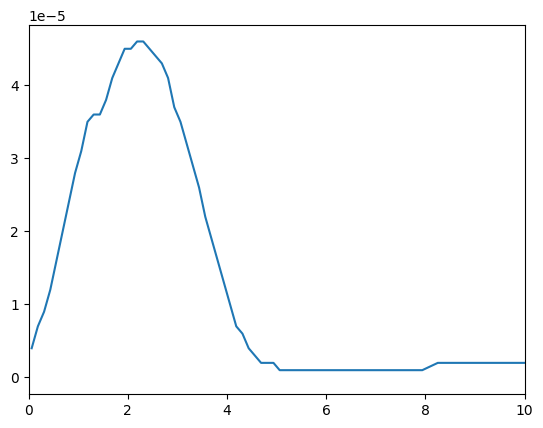

In [7]:
import pyNuHepMC as nhm
import pyNUISANCE as pn
import numpy as np
import matplotlib.pyplot as plt

evs = pn.EventSource("neut_DUNE_numu_BS1pi_LFG_1.21.pb.gz")
if not evs:
    print("Error: failed to open input file")

gri = evs.first()[0].run_info()
numu_flux_dist = nhm.ReaderUtils.GC7.read_all_energy_distributions(gri)[14]
bin_edges = numu_flux_dist.bin_edges
flux_bin_centers = np.array([0 for x in range(len(bin_edges) - 1)])
for i in range(len(bin_edges) - 1):
    flux_bin_centers[i] = ((bin_edges[i]+bin_edges[i+1])/2.0)
ToGeV = 1E-3 if (numu_flux_dist.energy_unit == "MEV") else 1.0
flux_bin_centers =  flux_bin_centers * ToGeV
plt.xlim([0,10])
plt.plot(flux_bin_centers,numu_flux_dist.bin_content)

flux_int = np.sum(np.array(numu_flux_dist.bin_content))
print("total flux_integral %s" % flux_int)